# Tutorial

    If you are wondering how to use this tutorial, first make sure you have Nextrout - and all its dependencies - installed :)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.tri as mtri
import random
import numpy as np
#----------------------

import tools_opt_urban_nextrout as tl

/home/dleite/opt-urban-nextrout/code/dmk_utilities/globals/python/timedata
/home/dleite/opt-urban-nextrout/code
/home/dleite/opt-urban-nextrout/code/dmk_utilities/dmk_solver/otp_solver/preprocess/assembly
/home/dleite/opt-urban-nextrout/code/dmk_utilities/globals/python/timedata
/home/dleite/opt-urban-nextrout/code/dmk_utilities/dmk_solver/build/python/fortran_python_interface


* We first set the set of sources and sinks, extracted from the coordinates of the real networks

## Defining the Optimal Transport (OT) problem

### Example: Rome Subway

In [3]:
'''
Parameters: city, transportation mode and centrality; 
for a complete list of city and transportation modes, check the data folder.
'''

city       = 'rome'
tmode      = 'subway'
centrality = 'degree'

In [4]:
'''
Reads the set xplus, xminus with the source/sink coordinates (x,y)
'''

xplus  = tl.find_xy_coords(city, tmode, centrality, 'source')
xminus = tl.find_xy_coords(city, tmode, centrality, 'sink')

xplus, xminus

([(0.3288633055734884, 0.5418382566363391),
  (0.7029317458059303, 0.35969664138677615),
  (0.6741702141629915, 0.597894652140539),
  (0.4728044736755699, 0.3146239198094065),
  (0.5758215782619658, 0.65978486712973),
  (0.96967793475525, 0.42467044667513676)],
 [(0.5149520130445744, 0.5267364234375833)])

* **run the continuous dmk solver - the solutions for our continuous OT-problem**

In [7]:
beta=1.8
tdpot, timefun, G_ext = tl.run_nextrout(xplus,xminus, beta, niter=100)

len_attributes 3174
3174 1648 3
 grid from data
 grid sizecell
 grid done
 subgrid refined
 subgrid nodenode
 subgrid genrcm
 subgrid renumber
len_attributes 3174
3174 1648 3
 grid from data
 grid sizecell
 grid done
 subgrid refined
 subgrid nodenode
 subgrid genrcm
 subgrid renumber
 project       12696        6469
 project
 forcing
convergence achieved!.
 dirac
 project       12696        6469
 project
 forcing
 dirac
 timefun T
 WCT:       2.85 (s) ; USR:       2.86 (s) 


**Once the solution is obtained, it is time to convert it into a graph.**

In [8]:
sources = tl.find_sources(G_ext, city, tmode, centrality)
sinks   = tl.find_sinks(G_ext, city, tmode, centrality)

In [9]:
sources, sinks

([184, 2399, 2486, 507, 2514, 3159], [2074])

In [11]:
beta_d = 1.5
Gf, weights, colors, inputs_discr = tl.graph_filtering(G_ext, sources, sinks, beta_d)

0.22681642883115466
********** Graph ******************************************************
#Node =        49 #Nedges=        52 |  1.28E-02 <= |w=weight| <= 4.21E-02
********** INPUTS *****************************************************
********** SYNCRONIZATION TDPOT ***************************************
Steady Inputs
1.45E-02<= TDENS <= 5.99E-01
CTRL: relax_tdens= 0.00E+00 relax_direct= 1.00E-10 relax4prec= 1.00E-10
ctrl%build_prec ==1 : ASSEMBLING STIFF + BUILDING PREC
0    1 1.2E-10 3.4E-16 1.1E-15  <<PCG>>WCT:0.0E+00 s
**********  ***********************************************************

********** INFO SYSTEM ************************************************
**********  ***********************************************************
 iter. =    0 | time  =  0.00E+00 | cpu =  0.00E+00
1.45E-02<=TDENS<= 5.99E-01

********** UPDATE 00001 | TIME STEP = 4.00E-01 ************************
-6.78E-02 < TDENS INCREMENT <  3.13E-01
Steady Inputs
9.29E-03<= TDENS <= 4.89E-01
CTRL: relax_td

********** INFO SYSTEM ************************************************
**********  ***********************************************************
 iter =   42 | time =  1.68E+01 | cpu =  9.00E-03s (100%)  | var =  5.72E-07
1.00E-10<=TDENS<= 3.97E-01

********** UPDATE 00043 | TIME STEP = 4.00E-01 ************************
-2.13E-07 < TDENS INCREMENT <  5.32E-08
Steady Inputs
1.00E-10<= TDENS <= 3.97E-01
CTRL: relax_tdens= 0.00E+00 relax_direct= 1.00E-10 relax4prec= 1.00E-10
0    4 3.5E-05 4.4E-14 4.4E-14  <<PCG>>WCT:0.0E+00 s
********** UPDATE SUCCEED - CPU:0.00E+00 ******************************

********** INFO SYSTEM ************************************************
**********  ***********************************************************
 iter =   43 | time =  1.72E+01 | cpu =  9.00E-03s (100%)  | var =  3.44E-07
1.00E-10<=TDENS<= 3.97E-01

********** UPDATE 00044 | TIME STEP = 4.00E-01 ************************
-1.28E-07 < TDENS INCREMENT <  3.20E-08
Steady Inputs
1.00E-10<= TDENS <= 3.9

<IPython.core.display.Javascript object>


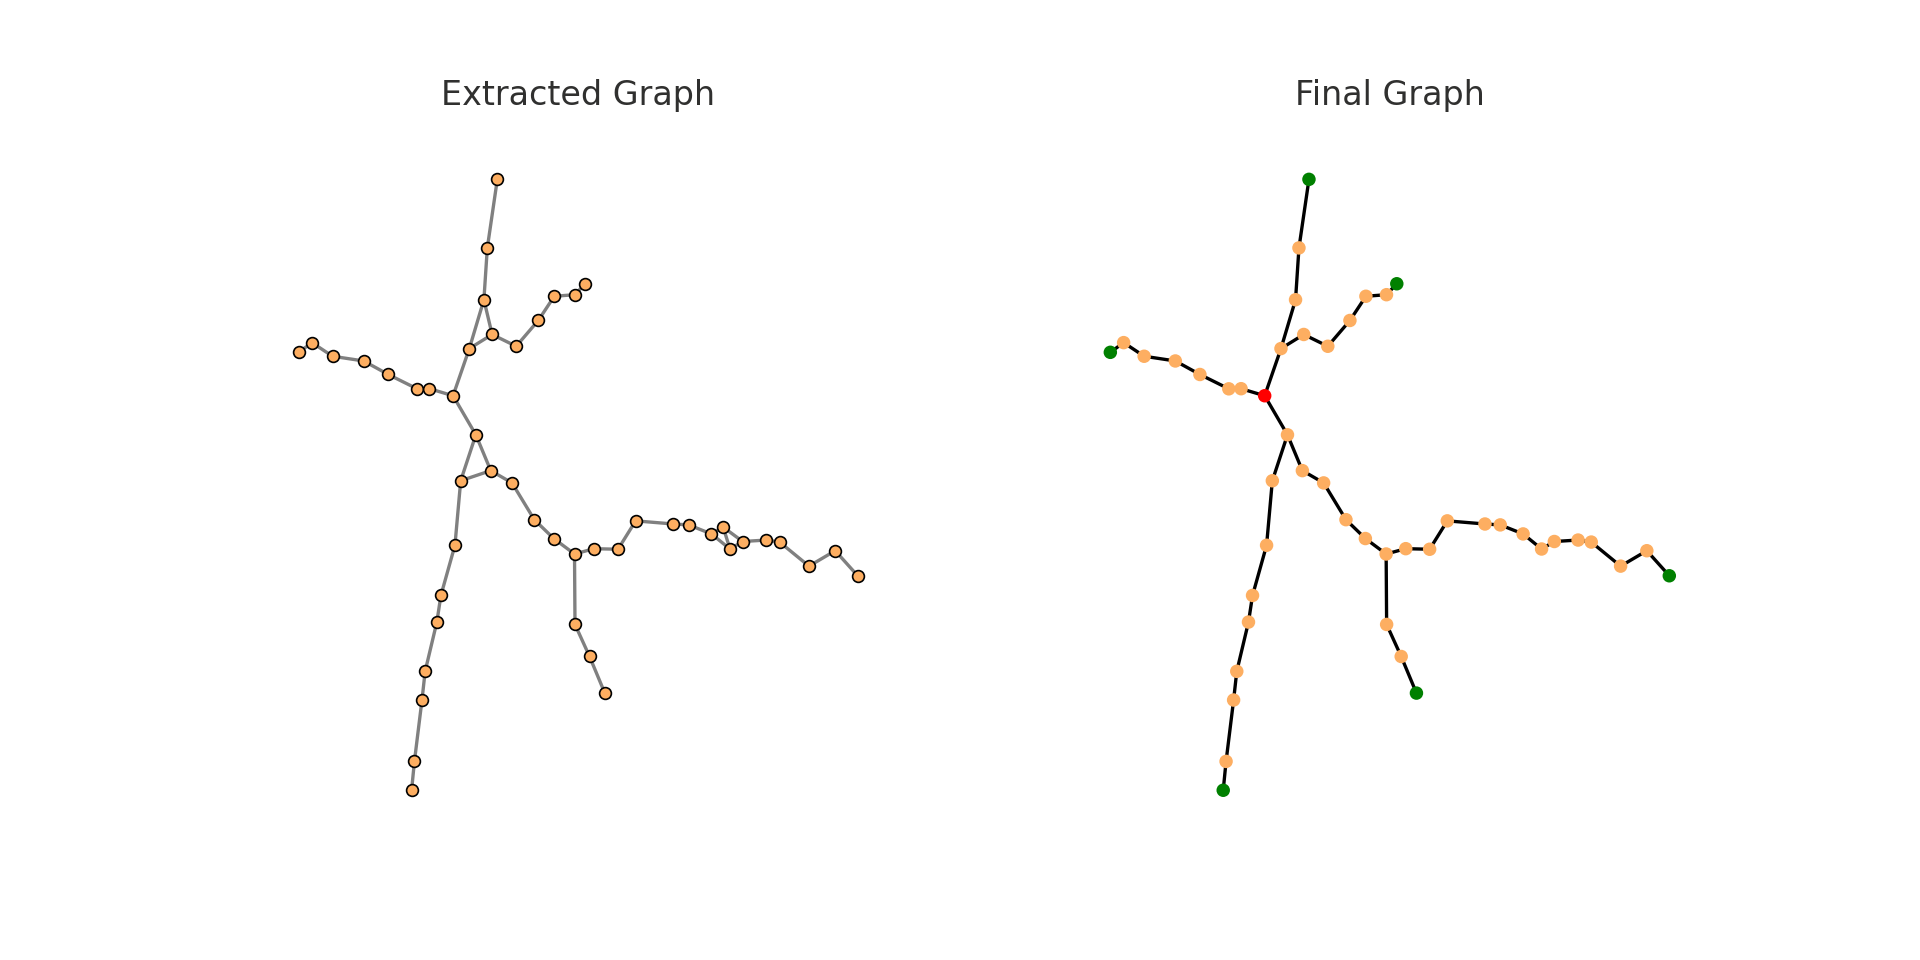

In [ ]:
%matplotlib notebook

fig1, axs = plt.subplots(1,2,figsize=(16, 8))

pos_G_extracted = nx.get_node_attributes(G_ext,'pos')
nx.draw(G_ext,pos_G_extracted,  node_size = 50, width = 2,  node_color='#fdae61',
        edgecolors='k', edge_color = 'gray', ax = axs[0])

axs[0].set_title(f'Extracted Graph', fontsize=20, color='#30302f', loc='center')

pos = nx.get_node_attributes(Gf,'pos')
nx.draw(Gf, pos, node_size = 50, node_color = colors, width = 2 , ax = axs[1], with_labels = False)

axs[1].set_title(f'Final Graph', fontsize=20, color='#30302f', loc='center')

plt.show()